# Information from Kaggle

The following information is directly copied from this dataset's <a href='https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil' target='_blank'>Kaggle Page</a>.

<h2>The Data</h2>

<p>The National Agency of Petroleum, Natural Gas and Bio fuels (<em>ANP</em> in Portuguese) releases weekly reports of gas, diesel and other fuels prices used in transportation across the country. These datasets bring the mean value per liter, number of gas stations analyzed and other information grouped by regions and states across the country.</p>

<h2>Source</h2>

<p>As stated before, these datasets are provided by ANP, and are regularly updated with new dates and information - which can be retrieved <a href="http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis" rel="nofollow">here</a> (in portuguese).</p>

<h2>What can be done with this?</h2>

<ul>
<li>How different regions of Brazil saw their gas prices change?</li>
<li>Within a region, which states increased more their prices?</li>
<li>Which states are the cheapest (or most expensive) for different types of fuels?</li>
</ul>

<a href='https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil' target='_blank'>Kaggle Link</a>

# Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()

# Ignoring warnings
warnings.simplefilter('ignore')

Loading the dataset into a pandas dataframe.

In [2]:
data = pd.read_table('2004-2019.tsv', parse_dates=[1, 2])
df = data.copy()

df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


# Data Wrangling

## Deleting the unneccesary column "Unnamed: 0"

In [3]:
df.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Renaming the column names from portuguese to English

In [4]:
list(df.columns)

['DATA INICIAL',
 'DATA FINAL',
 'REGIÃO',
 'ESTADO',
 'PRODUTO',
 'NÚMERO DE POSTOS PESQUISADOS',
 'UNIDADE DE MEDIDA',
 'PREÇO MÉDIO REVENDA',
 'DESVIO PADRÃO REVENDA',
 'PREÇO MÍNIMO REVENDA',
 'PREÇO MÁXIMO REVENDA',
 'MARGEM MÉDIA REVENDA',
 'COEF DE VARIAÇÃO REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
 'MÊS',
 'ANO']

In [5]:
new_column_names = [
    'analysis_first_day',
    'analysis_last_day',
    'macro_region',
    'state',
    'product_kind',
    'no_gas_stations_analyzed',
    'measurement_unit',
    'avg_price',
    'std',
    'min_price_observed',
    'max_price_observed',
    'mean_price_margin',
    'coefficient_of_variation',
    'mean_distribution_price',
    'distribution_std',
    'distribution_min_price',
    'distribution_max_price',
    'distribution_coefficient_of_variation',
    'month',
    'year'
]

df.columns = new_column_names
list(df.columns)

['analysis_first_day',
 'analysis_last_day',
 'macro_region',
 'state',
 'product_kind',
 'no_gas_stations_analyzed',
 'measurement_unit',
 'avg_price',
 'std',
 'min_price_observed',
 'max_price_observed',
 'mean_price_margin',
 'coefficient_of_variation',
 'mean_distribution_price',
 'distribution_std',
 'distribution_min_price',
 'distribution_max_price',
 'distribution_coefficient_of_variation',
 'month',
 'year']

In [6]:
df.head()

,analysis_first_day,analysis_last_day,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Check for any null value

In [7]:
df.isnull().sum()

analysis_first_day                       0
analysis_last_day                        0
macro_region                             0
state                                    0
product_kind                             0
no_gas_stations_analyzed                 0
measurement_unit                         0
avg_price                                0
std                                      0
min_price_observed                       0
max_price_observed                       0
mean_price_margin                        0
coefficient_of_variation                 0
mean_distribution_price                  0
distribution_std                         0
distribution_min_price                   0
distribution_max_price                   0
distribution_coefficient_of_variation    0
month                                    0
year                                     0
dtype: int64

We have no null value so no need to worry about it 'yet'.

## Number of Rows and Columns

In [8]:
print('Number of rows:   ', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of rows:    106823
Number of Columns: 20


## Let's check the summary statistics

In [9]:
df.describe()

,no_gas_stations_analyzed,avg_price,std,min_price_observed,max_price_observed,coefficient_of_variation,month,year
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


We can see that the price column is right skewed because mean is greater than the 50% quartile (or median). This information may come in handy later.

## Datatypes

In [10]:
df.dtypes.to_frame(name='Data Type')

,Data Type
analysis_first_day,datetime64[ns]
analysis_last_day,datetime64[ns]
macro_region,object
state,object
product_kind,object
no_gas_stations_analyzed,int64
measurement_unit,object
avg_price,float64
std,float64
min_price_observed,float64


Let's check some of the datatypes which are object and should be numerical.

In [11]:
check_df = (df.dtypes == np.object).reset_index()
check_df[check_df[0] == True]['index'].reset_index().drop('level_0', axis=1)

,index
0,macro_region
1,state
2,product_kind
3,measurement_unit
4,mean_price_margin
5,mean_distribution_price
6,distribution_std
7,distribution_min_price
8,distribution_max_price
9,distribution_coefficient_of_variation


Data types of the following columns should be numerical but are of type object:<br>
* mean_price_margin
* mean_distribution_price
* distribution_std
* distribution_min_price
* distribution_max_price
* distribution_coefficient_of_variation

### Dealing with the column: mean_price_margin

Let's first check the unique values.

In [12]:
df.mean_price_margin.unique()

array(['0.463', '0.399', '0.419', ..., '1.007', '0.876', '1.179'],
      dtype=object)

Now, let's check if there is a value other than floats.

In [13]:
def is_float(n):
    try:
        float(n)
        return True
    except ValueError:
        return False

In [14]:
df.mean_price_margin[~df.mean_price_margin.apply(lambda x: is_float(x))].unique()

array(['-'], dtype=object)

Let's check the ratio of "-" appearing in the table as compared to the all rows to decide how to replace it.

In [15]:
appearance = df.mean_price_margin[~df.mean_price_margin.apply(lambda x: is_float(x))].value_counts().iloc[0]
total_entries = df.shape[0]
perc_of_occurance = (appearance / total_entries) * 100

print('Number of times "-" appeared:', appearance)
print('Total number of entries:     ', total_entries)
print('Percentage of occurance:     ', round(perc_of_occurance, 2), '%')

Number of times "-" appeared: 3431
Total number of entries:      106823
Percentage of occurance:      3.21 %


Since, that is about only 3.2 percent of the total data. We might as well delete these entire rows instead of replacing them with any value.

In [16]:
df = df[df.mean_price_margin.apply(lambda x: is_float(x))]

Now, converting all the values of this column into float.

In [17]:
df.mean_price_margin = df.mean_price_margin.apply(lambda x: float(x))
df.mean_price_margin.dtypes

dtype('float64')

### Dealing with the column: mean_distribution_price

Let's first check the unique values.

In [18]:
df.mean_distribution_price.unique()

array(['0.825', '0.763', '0.97', ..., '49.214', '54.078', '57.05'],
      dtype=object)

Let's check if there are any values other than floats.

In [19]:
df.mean_distribution_price[~df.mean_distribution_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

There are no values other than floats (in string representation). Converting all the string representations of floats to actual floats.

In [20]:
df.mean_distribution_price = df.mean_distribution_price.apply(lambda x: float(x))
df.mean_distribution_price.dtypes

dtype('float64')

### Dealing with the column: distribution_std

Let's first check the unique values.

In [21]:
df.distribution_std.unique()

array(['0.11', '0.088', '0.095', ..., '5.254', '6.52', '6.906'],
      dtype=object)

Let's check if values other than floats exist in the strings.

In [22]:
df.distribution_std[~df.distribution_std.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

There are no values other than floats (in string representation). Converting all the string representations of floats to actual floats.

In [23]:
df.distribution_std = df.distribution_std.apply(lambda x: float(x))
df.distribution_std.dtypes

dtype('float64')

### Dealing with the column: distribution_min_price

Let's first check the unique values.

In [24]:
df.distribution_min_price.unique()

array(['0.4201', '0.5013', '0.5614', ..., '50.68', '61.92', '40.19'],
      dtype=object)

Now, let's check if any value other than float exists.

In [25]:
df.distribution_min_price[~df.distribution_min_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

No value other than float exists. Let's convert the values to actual floats.

In [26]:
df.distribution_min_price = df.distribution_min_price.apply(lambda x: float(x))
df.distribution_min_price.dtypes

dtype('float64')

### Dealing with the column: distribution_max_price

Let's check the unique values.

In [27]:
df.distribution_max_price.unique()

array(['0.9666', '1.05', '1.161', ..., '4.3999', '4.095', '3.825'],
      dtype=object)

Now, let's check if any value other than float exists.

In [28]:
df.distribution_max_price[~df.distribution_max_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

Converting the values to float.

In [29]:
df.distribution_max_price = df.distribution_max_price.apply(lambda x: float(x))
df.distribution_min_price.dtypes

dtype('float64')

### Dealing with the column: distribution_coefficient_of_variation

Checking the unique values.

In [30]:
df.distribution_coefficient_of_variation.unique()

array(['0.133', '0.115', '0.098', '0.143', '0.082', '0.134', '0.062',
       '0.077', '0.096', '0.072', '0.083', '0.053', '0.153', '0.122',
       '0.06', '0.172', '0.147', '0.087', '0.168', '0.108', '0.151',
       '0.22', '0.157', '0.101', '0.119', '0.135', '0.116', '0.079',
       '0.139', '0.07', '0.054', '0.095', '0.084', '0.085', '0.149',
       '0.035', '0.059', '0.105', '0.217', '0.15', '0.123', '0.167',
       '0.111', '0.148', '0.128', '0.058', '0.088', '0.063', '0.162',
       '0.04', '0.156', '0.12', '0.08', '0.097', '0.141', '0.202',
       '0.103', '0.099', '0.164', '0.118', '0.081', '0.125', '0.091',
       '0.078', '0.106', '0.159', '0.049', '0.066', '0.126', '0.052',
       '0.221', '0.112', '0.131', '0.107', '0.138', '0.144', '0.073',
       '0.11', '0.086', '0.068', '0.136', '0.074', '0.14', '0.104',
       '0.17', '0.161', '0.093', '0.155', '0.094', '0.113', '0.064',
       '0.13', '0.109', '0.21', '0.16', '0.09', '0.163', '0.069', '0.129',
       '0.212', '0.092', 

Checking if any value other than float exists.

In [31]:
df.distribution_coefficient_of_variation[~df.distribution_coefficient_of_variation.apply(lambda x: is_float(x))] 

Series([], Name: distribution_coefficient_of_variation, dtype: object)

Converting the values to float.

In [32]:
df.distribution_coefficient_of_variation = df.distribution_coefficient_of_variation.apply(lambda x: float(x))
df.distribution_coefficient_of_variation.dtypes

dtype('float64')

### Checking the datatypes for the final time.

In [33]:
df.dtypes

analysis_first_day                       datetime64[ns]
analysis_last_day                        datetime64[ns]
macro_region                                     object
state                                            object
product_kind                                     object
no_gas_stations_analyzed                          int64
measurement_unit                                 object
avg_price                                       float64
std                                             float64
min_price_observed                              float64
max_price_observed                              float64
mean_price_margin                               float64
coefficient_of_variation                        float64
mean_distribution_price                         float64
distribution_std                                float64
distribution_min_price                          float64
distribution_max_price                          float64
distribution_coefficient_of_variation           

Let's look at the first two columns "analysis_first_day" & "analysis_last_day". We can engineer a new feature which would be the number of days the prices are analyzed. Let's do this.

In [34]:
# Defining the function to get the number of days the analysis is done
def get_num_days_analysis_done(last_day, first_day):
    return (last_day - first_day).days


# Making a new column named as 'num_of_days_analysis_done'
df['num_of_days_analysis_done'] = df[['analysis_first_day', 'analysis_last_day']].apply(
    lambda x: get_num_days_analysis_done(x.analysis_last_day, x.analysis_first_day), axis=1)

# Deleting the first two columns because we don't need them anymore
df.drop(['analysis_first_day', 'analysis_last_day'], axis=1, inplace=True)

# Checking the first five rows
df.head()

,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year,num_of_days_analysis_done
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,6
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,6
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,6
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,6
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,6


Now, let's check if 6 is the only number of days the prices are analyzed or there may be the case that some gas prices are analyzed for more than one day, which would cause anomaly in the data.

In [35]:
print('Unique number of  days the gas prices are analyzed:', list(df.num_of_days_analysis_done.unique()))

Unique number of  days the gas prices are analyzed: [6]


Alright, so we can say that every entry is analyzed only for 6 days which is good.

### Dealing with month and year

We can see that the 'month' and 'year' column are of type integer. Let's merge them and make a DateTime object.

In [36]:
# Checking the first five rows once again to get the idea.
df.head()

,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year,num_of_days_analysis_done
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,6
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,6
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,6
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,6
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,6


In [37]:
print('Months:', sorted(df.month.unique()))
print('Years:', sorted(df.year.unique()))

Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


Let's merge year and month and make a new column named as date.

In [38]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
df.head()

,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year,num_of_days_analysis_done,date
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,6,2004-05-01
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,6,2004-05-01
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,6,2004-05-01
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,6,2004-05-01
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,6,2004-05-01


Now, we'll remove the 'year' and 'month' columns since we don't need them anymore.

In [39]:
df.drop(['year', 'month'], axis=1, inplace=True)
df.head()

,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,num_of_days_analysis_done,date
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,6,2004-05-01
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,6,2004-05-01
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,6,2004-05-01
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,6,2004-05-01
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,6,2004-05-01


In [40]:
df.dtypes.to_frame('Data Type')

,Data Type
macro_region,object
state,object
product_kind,object
no_gas_stations_analyzed,int64
measurement_unit,object
avg_price,float64
std,float64
min_price_observed,float64
max_price_observed,float64
mean_price_margin,float64


#### Hurrayyy

Now that our data is cleaned and some new features are engineered. It's time for some **Exploratory Data Analysis** to find the answers to the questions asked earlier.

# Answering the questions

Let's perform EDA to find the answer to the given three questions:<br>
<ol>
<li>How different regions of Brazil saw their gas prices change?</li>
<li>Within a region, which states increased more their prices?</li>
<li>Which states are the cheapest (or most expensive) for different types of fuels?</li>
</ol>

## Question 1: How different regions of Brazil saw their gas prices change?

Let's look at the different kinds of gases we have.

In [41]:
df_gases = pd.DataFrame(data=list(df.product_kind.unique()), columns=['Gases'])
df_gases

,Gases
0,ETANOL HIDRATADO
1,GASOLINA COMUM
2,GLP
3,GNV
4,ÓLEO DIESEL
5,ÓLEO DIESEL S10


First, let's take the aggregate of the prices of all gases region-wise.

In [66]:
df_regionwise_prices = df.groupby('macro_region')[['macro_region', 'avg_price']].sum().reset_index()
df_regionwise_prices

,macro_region,avg_price
0,CENTRO OESTE,178899.230
1,NORDESTE,342088.406
2,NORTE,303194.065
3,SUDESTE,164563.684
4,SUL,126282.784


Now, let's check which region has the most of average price. For now, we are talking about all the gases combined.

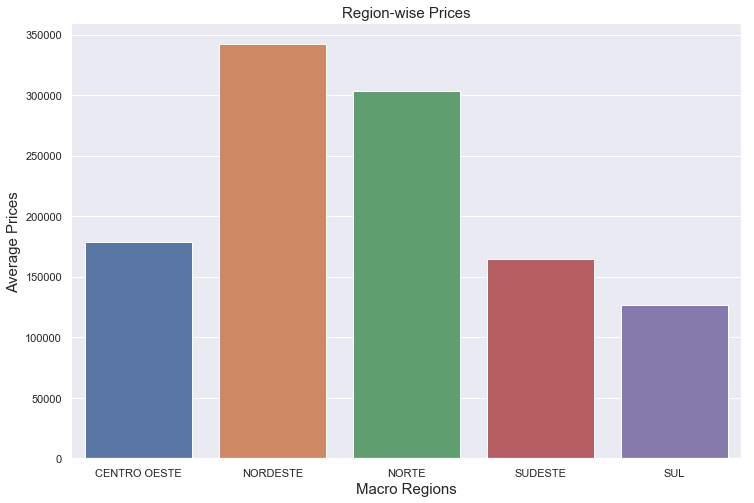

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_regionwise_prices.macro_region, y=df_regionwise_prices.avg_price)
plt.title('Region-wise Prices', fontsize=15)
plt.xlabel('Macro Regions', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)

plt.show()

The Macro Region 'NORDESTE' has the highest price, followed by NORTE as can be shown from the above bar chart.<br>
SUL is among the lowest.

Now, let's analyze the prices for each individual product kind.

Let's look at the gases again.

In [68]:
df_gases

,Gases
0,ETANOL HIDRATADO
1,GASOLINA COMUM
2,GLP
3,GNV
4,ÓLEO DIESEL
5,ÓLEO DIESEL S10


### Analyze each gas type one by one

Let's analyze each gas type one by one to get the insights.

#### ETANOL HIDRATADO

Let's first get the data of only the ETANLO HIDRATADO.

In [48]:
df_EH = df[df.product_kind == 'ETANOL HIDRATADO']
df_EH.head()

,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,num_of_days_analysis_done,date
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,6,2004-05-01
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,6,2004-05-01
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,6,2004-05-01
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,6,2004-05-01
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,6,2004-05-01


Now, let's aggregate the prices.

In [74]:
df_EH_agg = df_EH.groupby(by=['macro_region', 'date'])['avg_price'].sum().reset_index()
df_EH_agg.head()

,macro_region,date,avg_price
0,CENTRO OESTE,2004-05-01,20.524
1,CENTRO OESTE,2004-06-01,21.631
2,CENTRO OESTE,2004-07-01,21.629
3,CENTRO OESTE,2004-08-01,29.791
4,CENTRO OESTE,2004-09-01,24.362


Let's look at the prices trend in each region.

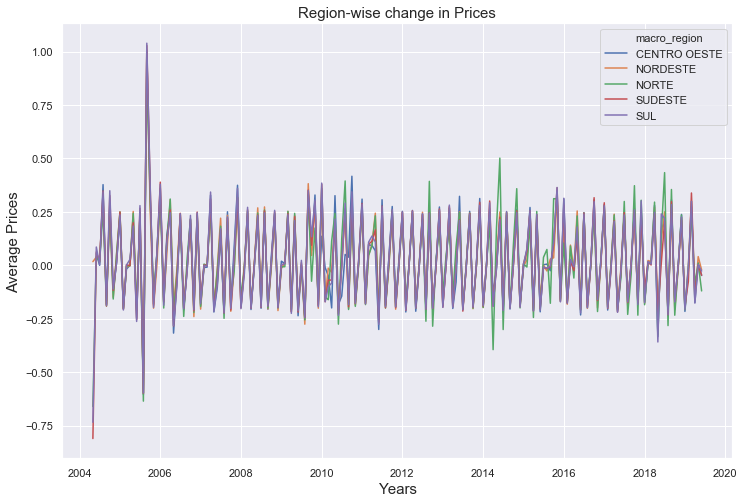

In [85]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=df_EH_agg.date, y=df_EH_agg.avg_price.pct_change(), hue=df_EH_agg.macro_region)
plt.title('Region-wise change in Prices', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Average Prices', fontsize=15)

plt.show()

## Question 2: Within a region, which states increased more their prices?

In [ ]:
df_region_state = df.groupby(['macro_region', 'state'])['avg_price'].max().to_frame()
df_region_state

In [ ]:
df_region_state = df_region_state.reset_index()

for region in list(df_region_state.macro_region.unique()):
    df_temp = df_region_state[df_region_state.macro_region == region][['state', 'avg_price']]
    region_name = region
    state_name = df_temp[df_temp.avg_price == df_temp.avg_price.max()]['state'].iloc[0]
    price = df_temp.avg_price.max()
    print('For region,', region, 'the state,', state_name, 'has increased most in their prices. Average price:', price)
    print()  # Adding a line-space

In [ ]:
sns.barplot(y='avg_price', x='state', hue='macro_region', data=df_region_state)

## Question 3: Which states are the cheapest (or most expensive) for different types of fuels?

Let's first check the different kinds of fuel we have.

In [ ]:
list(df.product_kind.unique())

Now, let's check how different states are cheapest or most expensive w.r.t the type of fuel.

In [ ]:
sns.catplot(kind='bar', x='avg_price', y='state', col='product_kind', col_wrap=2, data=df)